In [1]:
import math
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from tabulate import tabulate

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

# The following imports NEED to be in the exact order
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
from validation.tokeneconomy.baseline import economyconfig
from validation.plot_functions import *
from cadCAD import configs

exec_mode = ExecutionMode()

In [2]:
exec_mode = ExecutionMode()
exec_ctx = ExecutionContext(context=exec_mode.local_mode)
simulation = Executor(exec_context=exec_ctx, configs=configs)
raw_system_events, tensor_field, session = simulation.execute()
df = pd.DataFrame(raw_system_events) 


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1040, 1, 10, 22)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ns       : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 102.29s


In [3]:
pd.options.mode.chained_assignment = None
df['lambda_S_factor'] = df['R'] / df['R_prev']
df['lambda_D_factor'] = df['P_prev'] / df['P']

# factors going into V
# V(t) ~ (P(t) * Q(t) + B(t)) / (C(t) * Q(t))
df['CQ'] = df['C'] * df['Q']
df['PQ_K'] = df['P'] * df['Q']
df['PQplusB_K'] = df['P'] * df['Q'] + df['B']
df['PQ_FIAT'] = df['P'] * df['Q'] * df['K']
df['PQplusB_FIAT'] = (df['P'] * df['Q'] + df['B']) * df['K']
df['PoverC'] = df['P'] / df['C']
df['BoverCQ'] = df['B'] / df['CQ']
df['P_FIAT'] = df['P'] * df['K']
df['V_inverse'] = 1.0 / df['V']
df['log_K'] = np.log(df['K'])
df['log_P_FIAT'] = np.log(df['P_FIAT'])
# df['delta_KPI'] = df['KPI'] - df['KPI_prev']
df['PprevOverP'] = df['P_prev'] / df['P']
df['QoverQprev'] = df['Q'] / df['Q_prev']
df['QoverQ0'] = df['Q'] / df['Q'].iloc[0]

# supply - demand
df['SdiffD'] = df['S'] - df['D']
df['DdiffS'] = df['D'] - df['S']

In [4]:
aggregate_dimension = 'timestep'

mean_df = df.groupby(aggregate_dimension).mean().reset_index()
median_df = df.groupby(aggregate_dimension).median().reset_index()
std_df = df.groupby(aggregate_dimension).std().reset_index()
min_df = df.groupby(aggregate_dimension).min().reset_index()
df.rename(columns={'weeks': "timestep"}, inplace=True)

### Simulation - simple exponential decay block rewards

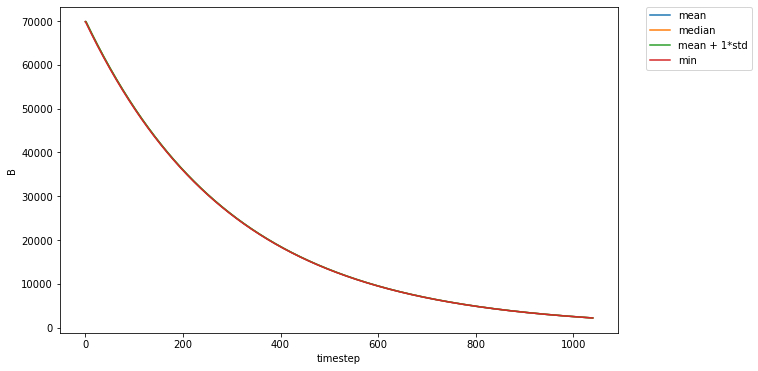

In [5]:
dist_plot(df, 'timestep', 'B')

#### K - secondary market price of token

<Figure size 432x288 with 0 Axes>

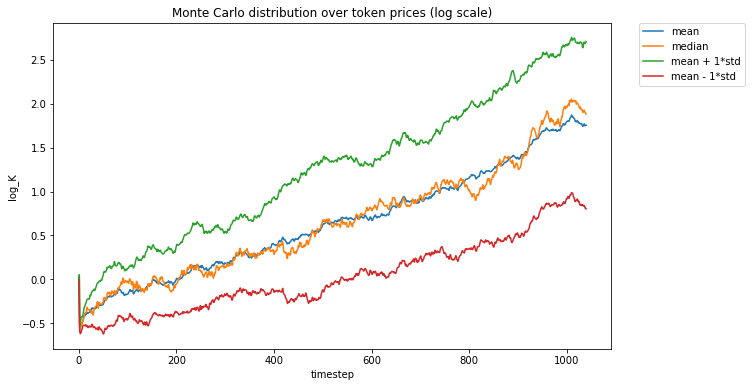

In [6]:
plt.figure()
dist_plot(df, 'timestep', 'log_K', suppMin=True)
title_text = 'Monte Carlo distribution over token prices (log scale)'
plt.title(title_text)
plt.show()

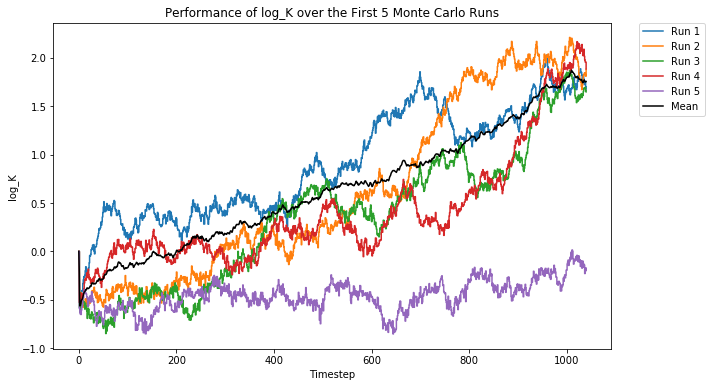

In [7]:
first_five_plot(df, 'log_K')

#### Q - service transacted on the platform